 #  TP 4 - Equations différentielles :

#### - NOM PRENOM :CACHEUX Nolan
#### - NOM PRENOM :SOULAS Benjamin

## Equations différentielles

Supposons que l’on souhaite résoudre l’équation différentielle :

$y′(x) + y(x) = e^{-x}$

On définit d’abord la variable et la fonction inconnue 

In [5]:
var('x') ;
function('Y') (x) #déclare Y comme fonction de x

Y(x)

Remarque : Pour déclarer y comme fonction de x, évitez d’écrire l’assignation y = function('y', x) car alors y désignerait l’expression y(x) et non la fonction !
Puis on utilise l’instruction desolve :


In [6]:
show(desolve(diff(Y(x),x)+Y(x) == e^(-x), Y(x)))

(_C + x)*e^(-x)

Ou

In [7]:
eq_diff = diff(Y(x),x) + Y(x) - e^(-x)
sol(x) = desolve(eq_diff, Y(x))
show(sol)


x |--> (_C + x)*e^(-x)

La condition initiale y(0) = 1 est précisé via l’option ICS :


In [8]:
sol_ci(x) = desolve(diff(Y(x),x)+Y(x) == e^(-x), Y(x), ics=[0,1])
show(sol_ci)

x |--> (x + 1)*e^(-x)

Vérifiez enfin que cette fonction est bien solution de l’équation différentielle.


In [9]:
eq_diff.substitute_function(Y,sol_ci)

0

On résout de même les équations différentielles d’ordre 2 :
y′′(x) + 2y′(x) + y(x) = x + 1, y(0) = 1, y′(0) = 2

In [10]:
 desolve(diff(Y(x),x,2)+2*diff(Y(x),x)+Y(x)==1+x,Y(x),ics=[0,1,2])

(3*x + 2)*e^(-x) + x - 1

La commande plot_slope_field permet de représenter le champ de pentes associé à une
équation différentielle de la forme

y′ = f(x, y).

On utilise la commande plot_slope_field avec pour argument : le membre de droite f(x, y),
l’intervalle de x, l’intervalle de y.
Remarque : il faut declarer x, y comme variables !

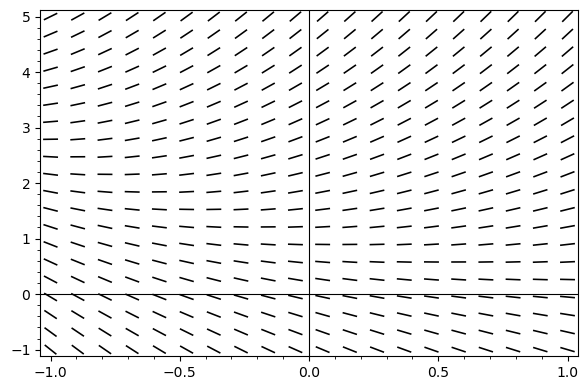

In [11]:
var('x,y')
plot_slope_field(y-e^(-x),(x,-1,1),(y,-1,5))

Soit l’équation différentielle :
y′ = y + x + 2 (E).

En utilisant la commande desolve (voir help(desolve)):

a) Résoudre (E).

In [12]:
var('x') ;
function('Y') (x) #déclare Y comme fonction de x

sol(x) = desolve( diff(Y(x),x)== Y(x) + x + 2, Y(x))
show(sol)

x |--> -((x + 1)*e^(-x) - _C + 2*e^(-x))*e^x

b) Résoudre (E) avec la condition initiale y(0) = 3

In [13]:
var('x') ;
function('Y') (x) #déclare Y comme fonction de x

sol(x) = desolve( diff(Y(x),x)== Y(x) + x + 2, Y(x),ics=[0,3])
show(sol)

x |--> -x + 6*e^x - 3

c) Vérifiez que la fonction trouvée au point b) est bien solution de l’équation différentielle (E).

In [14]:
var('x') ;
function('Y') (x) #déclare Y comme fonction de x

sol_ci(x) = desolve( diff(Y(x),x)== Y(x) + x + 2, Y(x),ics=[0,3])
show(eq_diff.substitute_function(Y,sol_ci))
# C'est bien égal à 0 donc la fonction est bien solution de l’équation différentielle (E).


-x - e^(-x) + 12*e^x - 4

d) Représenter sur le même graphe le champ de pentes associé à (E) ainsi que la courbe intégrale correspondante à la condition initiale

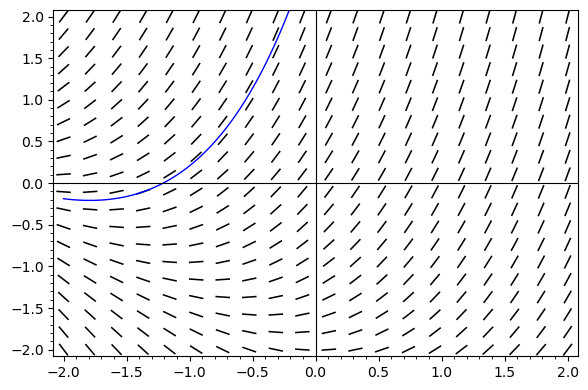

In [15]:
var('x')
function('Y') (x) #déclare Y comme fonction de x

eqdiff = y + x + 2

courbe(x) = desolve( diff(Y(x),x)== Y(x) + x + 2, Y(x),ics=[0,3])

field = plot_slope_field(eqdiff, (x,-2,2),(y,-2,2)) #le champ de pentes associé à (E)

curve = plot(courbe, (x,-2,2), ymin=-2, ymax=2) #la courbe intégrale correspondante à la condition initiale

show(field + curve)





## EXERCICE 2 

On va étudier graphiquement l’équation différentielle :$$ y′ = −2xy $$

a) Représenter le champ de pentes associé à cette équation différentielle.

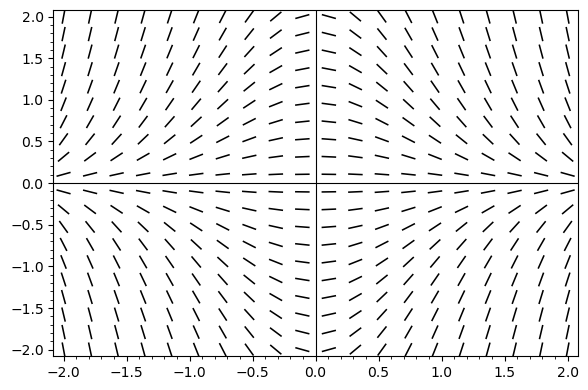

In [16]:
var('x,y')

eqdiff = -2*x*y
plot_slope_field(eqdiff, (x,-2,2),(y,-2,2)) #le champ de pentes associé à  l'équation différentielle.

b) Résoudre l’équation.

In [17]:
var('x') ;
function('Y') (x) #déclare Y comme fonction de x

sol = desolve( diff(Y(x),x)== -2*x*Y(x), Y(x))
show(sol)


_C*e^(-x^2)

c) Tracer, sur un même graphe, les courbes intégrales correspondant aux solutions définies par y(0) = k, pour différentes valeurs de k ∈ R.


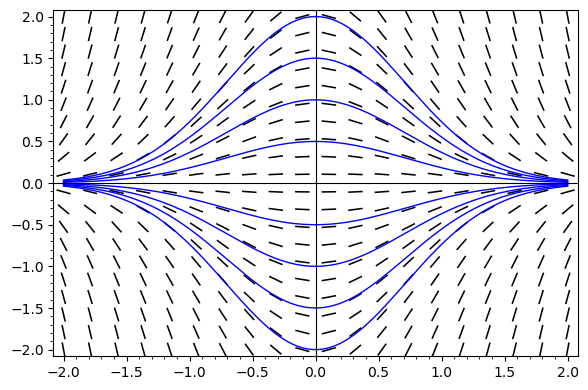

In [18]:
var('x,y,k')
function('Y') (x) #déclare Y comme fonction de x

eqdiff = -2*x*y
courbes_integrales = [-2, -1.5, -1, -0.5, 0.5, 1, 1.5, 2]

graphe = plot_slope_field(eqdiff, (x,-2,2),(y,-2,2)) #le champ de pentes associé à (E)

for k in courbes_integrales:
    sol_ci(x) = desolve( diff(Y(x),x)== -2*x*Y(x), Y(x),ics=[0,k])
    graphe+= plot(sol_ci, (sol_ci,-2,2), ymin=-2, ymax=2) #la courbe intégrale correspondante à la condition initiale y(0)
    
show(graphe)


## EXERCICE 3 

L’équation différentielle  :

$$x′′(t) + fx′(t) + \tfrac{k}{m} x(t) = 0$$

correspond au mouvement d’une masse m attachée à un ressort de constante k > 0 et subissant
une force de frottement inversement proportionnelle à sa vitesse multipliée par une constante
f ≥ 0


a) Résoudre et tracer sur l’intervalle [−1, 10] les solutions pour différentes valeurs de f : 
f = 0, f = 1 et f = 2 (et prendre k = 1, m = 1 ), avec les conditions initiales :
x(0) = 1 et x′(0) = 0.

cos(t)

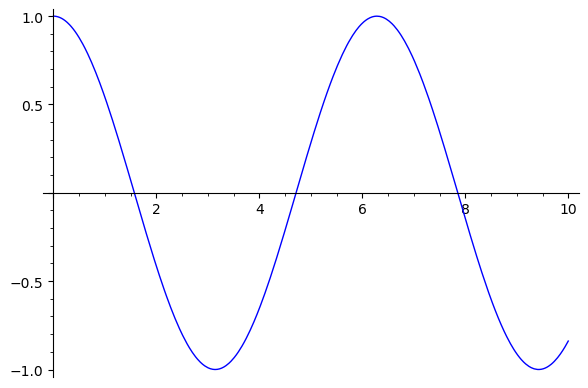

In [19]:
#Solution pour f = 0
f = 0
k = 1
m = 1

var('t') ;
function('x') (t)#déclare x comme fonction de t


sol = desolve(diff(diff(x(t),t)(t),t) + f*diff(x(t),t)+(k/m)*x(t)== 0, x(t),ics=[0,1,0])
show(sol)
plot(sol, (x,0,10), ymin=-1, ymax=1)

1/3*(sqrt(3)*sin(1/2*sqrt(3)*t) + 3*cos(1/2*sqrt(3)*t))*e^(-1/2*t)

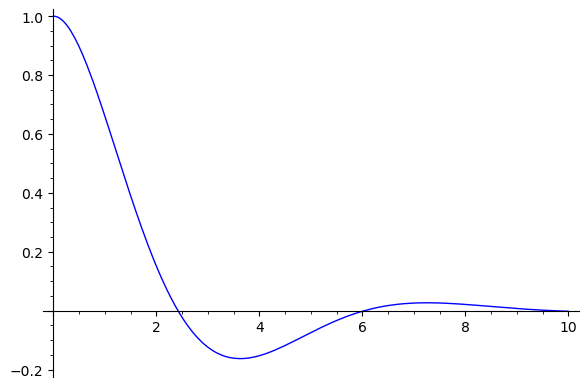

In [20]:
#Solution pour f = 1
f = 1
k = 1
m = 1

var('t') ;
function('x') (t)#déclare x comme fonction de t


sol = desolve(diff(diff(x(t),t)(t),t) + f*diff(x(t),t)+(k/m)*x(t)== 0, x(t),ics=[0,1,0])
show(sol)
plot(sol, (x,0,10), ymin=-0.2, ymax=1)

(t + 1)*e^(-t)

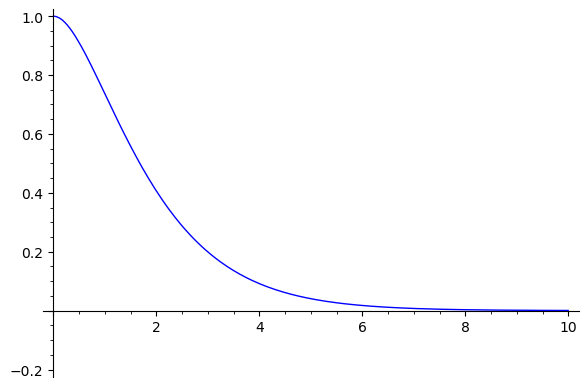

In [21]:
#Solution pour f = 2
f = 2
k = 1
m = 1

var('t') ;
function('x') (t)#déclare x comme fonction de t


sol = desolve(diff(diff(x(t),t)(t),t) + f*diff(x(t),t)+(k/m)*x(t)== 0, x(t),ics=[0,1,0])
show(sol)
plot(sol, (x,0,10), ymin=-0.2, ymax=1)


b) A partir des équations obtenues au point précedent, décrire le mouvement de la masse
obtenu pour ces trois valeurs de f .

In [22]:
# Type de mouvement pour f = 0
# Nous avons les 3 régimes types des oscillateurs harmoniques amortis. 
# Il s'agit ici d'un mouvement qui a un amortissement nul. 
# En effet, on peut voir que l'équation du mouvement est cos(t), 
# il n'y a aucune autre composante susceptible d'amortir le mouvement.

In [23]:
# Type de mouvement pour f = 1
# Nous avons ici un régime pseudo-périodique. Il y a une petite oscillation avant de s'arrêter complètement.

In [24]:
# Type de mouvement pour f = 2
# Il s'agit d'un régime critique. En effet, il n'y a aucune oscillation dans le mouvemement. Il tend directement vers 0.

## EXERCICE 4 
On considère l’équation différentielle :
$$ x^2 y′ = (x − 1)y \text{ } (E)$$

a) Caractériser l’équation différentielle (E)

In [2]:
#C'est une équation différentielle d'ordre 1 linéaire non homogène à coefficients non constants

b) Résoudre (E) sur R∗+

In [1]:
var('x') ;
function('Y') (x) #déclare Y comme fonction de x

sol(x) = desolve((x^2)*diff(Y(x),x) == (x-1)*Y(x), Y(x))
show(sol)

x |--> _C*x*e^(1/x)

c) Trouver la solution vérifiant y(1) = 2

In [2]:
var('x') ;
function('Y') (x) #déclare Y comme fonction de x

sol(x) = desolve((x^2)*diff(Y(x),x) == (x-1)*Y(x), Y(x),ics=[1,2])
show(sol)

x |--> 2*x*e^(1/x - 1)

d) Peut-on trouver une solution sur R ?

In [9]:
var('x')
function('Y') (x) #déclare Y comme fonction de x

sol(x) = desolve((x^2)*diff(Y(x),x) == (x-1)*Y(x), Y(x),ics=[1,2])
solve(sol(x), x)
#Oui, on peut trouver des solutions dans R

[x == 0]

## EXERCICE 5 
Résoudre l’équation différentielle suivante :
$$y′′ + 4y = sin(2x) + x^2$$

qui passe par le point (0, 1) et admet en ce point une tangente d’équation y = x.


In [58]:
#SANS CI

var('x') ;
function('Y') (x) #déclare Y comme fonction de x

sol = desolve(diff(diff(Y(x),x)(x),x) + 4*Y(x)==sin(2*x) +x^2, Y(x))
show(sol)

1/4*x^2 + _K2*cos(2*x) - 1/4*x*cos(2*x) + _K1*sin(2*x) - 1/8

In [59]:
#AVEC CI

# CI 1 : Passe par le point (0, 1) <=> y(0) = 1

# CI 2 : Admet au point (0, 1) une tangente d’équation y = x <=> y'(0) = 1

var('x') ;
function('Y') (x) #déclare Y comme fonction de x

sol = desolve(diff(diff(Y(x),x)(x),x) + 4*Y(x)==sin(2*x) +x^2, Y(x),ics=[0,1,1])
show(sol)

1/4*x^2 - 1/4*x*cos(2*x) + 9/8*cos(2*x) + 5/8*sin(2*x) - 1/8